In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize, least_squares

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_Sigmainv, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs
from aeons.lm_partial import analytic_lm_params
from aeons.bayes import logPr_bayes, logPr_laplace, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
simple_log, middle_log, full_log = simple_like(logX=True), middle_like(logX=True), full_like(logX=True)
from aeons.hessian import hess_autograd

In [2]:
def linear_step(X, theta, steps=10):
    return theta * np.floor(X * steps)/steps

In [3]:
nk = 500 * np.ones(500)
nk = data_at_iteration(samples_g_1, 2000)[0]
mean_X = X_mu(nk)
cov_X = X_Sigma(nk)
covinv_X = X_Sigmainv(nk)

In [4]:
X = np.random.multivariate_normal(mean_X, cov_X)
# X = generate_Xs(nk)
y = linear_step(X, 10)

(array([26.39978027]), array([9.38914789]))

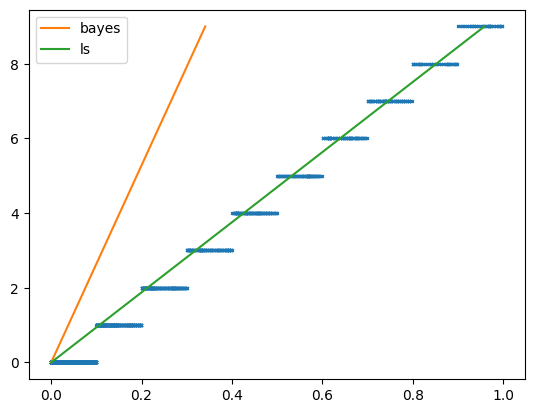

In [5]:
theta_b = minimise_bayes(y, linear, mean_X, covinv_X, 10).x
theta_l = minimise_ls(y, linear, mean_X, 10).x
plt.plot(X, y, 'x', ms=2)
plt.plot(linear.inverse(y, theta_b), y, label='bayes') 
plt.plot(linear.inverse(y, theta_l), y, label='ls')
plt.legend()
theta_b, theta_l